In [1]:
import os

os.getcwd()

'/Users/uqztuong/Library/CloudStorage/OneDrive-TheUniversityofQueensland/Documents/GitHub/tuonglab'

In [3]:
os.chdir("/Users/uqztuong/Downloads/")
os.getcwd()

'/Users/uqztuong/Downloads'

In [4]:
# let's point the file path to the data file, which is on /Volumes/TCRSEI-Q6195/DOUG-0002
input_path = "/Volumes/TCRSEI-Q6195/DOUG-0002/count/PT112_BL_GEX/outs/filtered_feature_bc_matrix/"

In [5]:
import scanpy as sc

sc.logging.print_header()

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/mambaforg

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.11.1 pandas==2.0.1 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [6]:
adata = sc.read_10x_mtx(input_path)
adata

AnnData object with n_obs × n_vars = 13214 × 36601
    var: 'gene_ids', 'feature_types'

In [7]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

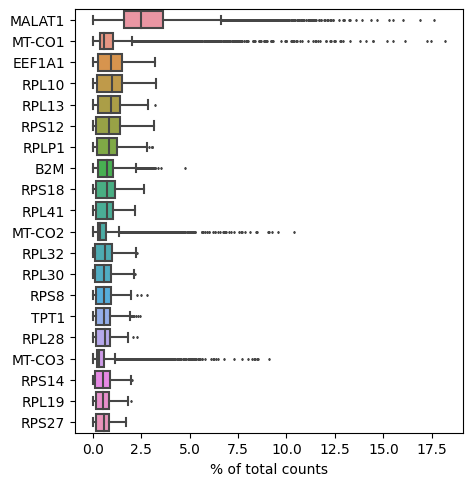

In [8]:
sc.pl.highest_expr_genes(
    adata,
    n_top=20,
)

In [9]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [10]:
adata.var["mt"] = adata.var_names.str.startswith(
    "MT-"
)  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

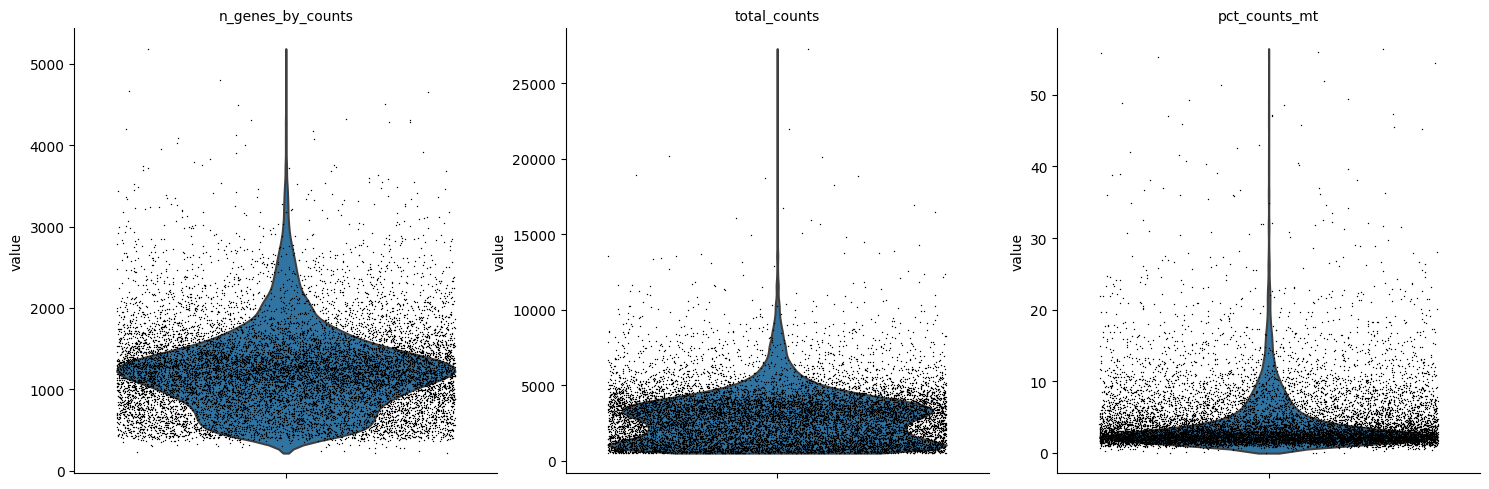

In [11]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

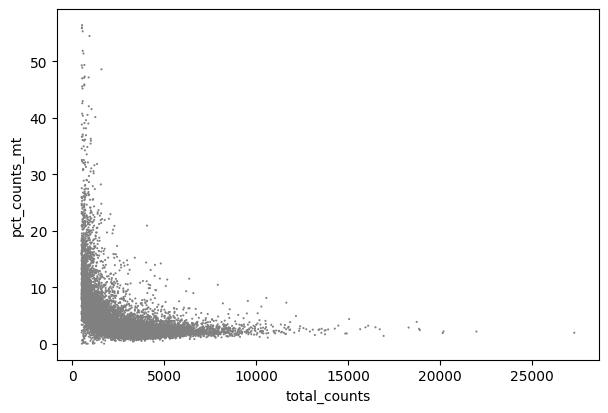

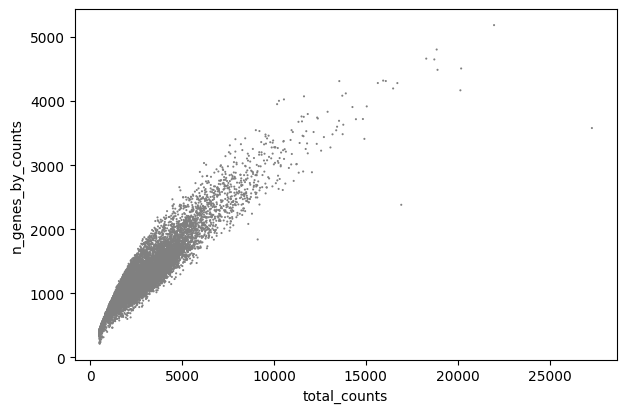

In [12]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

In [13]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [ ]:
# slicing in pandas

In [14]:
adata

View of AnnData object with n_obs × n_vars = 9581 × 20630
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [15]:
sc.pp.normalize_total(adata, target_sum=1e4)

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
sc.pp.log1p(adata)

In [17]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

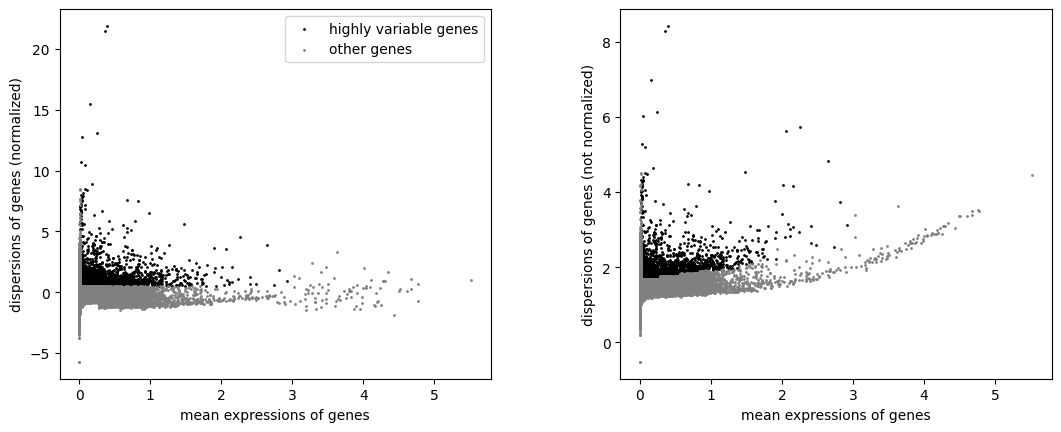

In [18]:
sc.pl.highly_variable_genes(adata)

In [19]:
adata.raw = adata  # stash the raw data for later

In [20]:
adata.var.highly_variable

AL627309.1    False
AL627309.5    False
LINC01409     False
LINC01128     False
LINC00115      True
              ...  
MAFIP         False
AL354822.1    False
AL592183.1     True
AC240274.1    False
AC233755.2    False
Name: highly_variable, Length: 20630, dtype: bool

In [21]:
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 9581 × 3093
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [22]:
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

In [23]:
sc.pp.scale(adata, max_value=10)  # why is scaling important for PCA?

In [24]:
sc.tl.pca(adata, svd_solver="arpack")

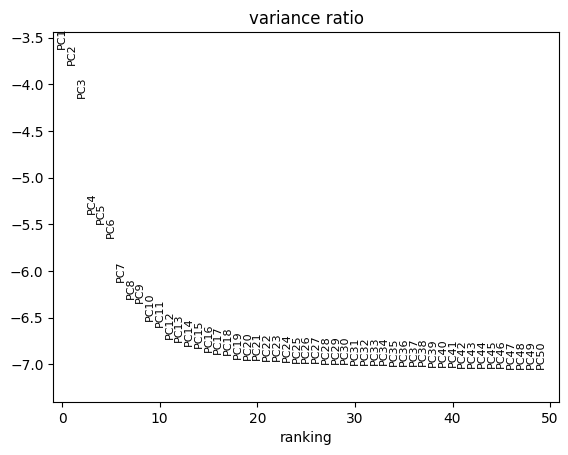

In [25]:
# what is PCA?
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [26]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# kNN graph and clustering

In [27]:
sc.tl.umap(adata)

In [28]:
# commmunity detection

In [29]:
adata

AnnData object with n_obs × n_vars = 9581 × 3093
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [30]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
AAACCTGAGATGTCGG-1,1006,1006,1517.0,31.0,2.043507,2
AAACCTGAGGATGTAT-1,1649,1649,3099.0,84.0,2.710552,14
AAACCTGAGGCAAAGA-1,1320,1320,4114.0,98.0,2.382110,1
AAACCTGAGTACGCCC-1,1180,1178,3597.0,80.0,2.224076,3
AAACCTGAGTATTGGA-1,1179,1179,3444.0,73.0,2.119628,1
...,...,...,...,...,...,...
TTTGTCATCCGCAAGC-1,1391,1391,4386.0,85.0,1.937984,0
TTTGTCATCGACCAGC-1,1534,1534,3882.0,52.0,1.339516,0
TTTGTCATCTTAGCCC-1,740,740,984.0,41.0,4.166667,7
TTTGTCATCTTCGAGA-1,905,905,2027.0,83.0,4.094721,3


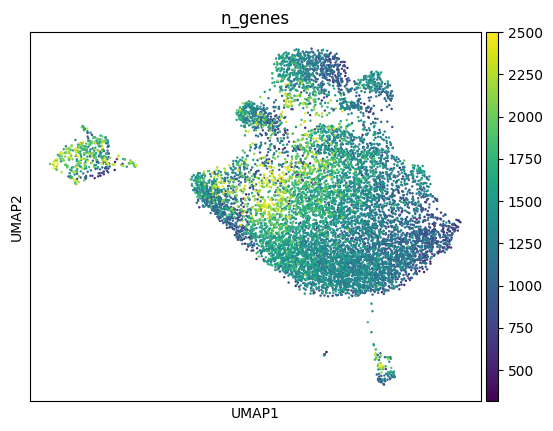

In [31]:
sc.pl.umap(adata, color="n_genes")

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


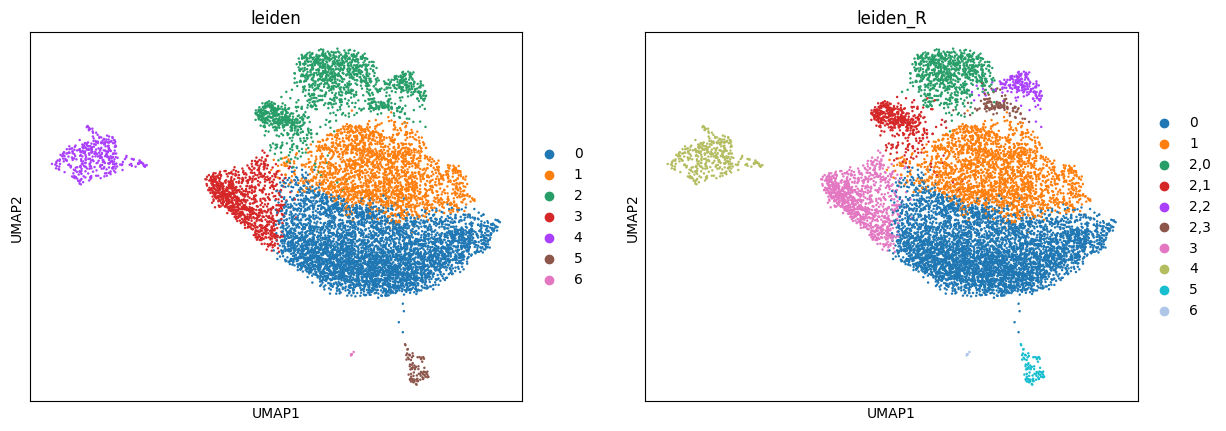

In [49]:
sc.tl.leiden(adata, resolution=0.2)
sc.tl.leiden(adata, resolution=0.4, restrict_to=("leiden", ["2"]), key_added="leiden_R")
sc.pl.umap(adata, color=["leiden", "leiden_R"])

In [50]:
sc.tl.rank_genes_groups(adata, groupby="leiden_R", method="wilcoxon")

In [51]:
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


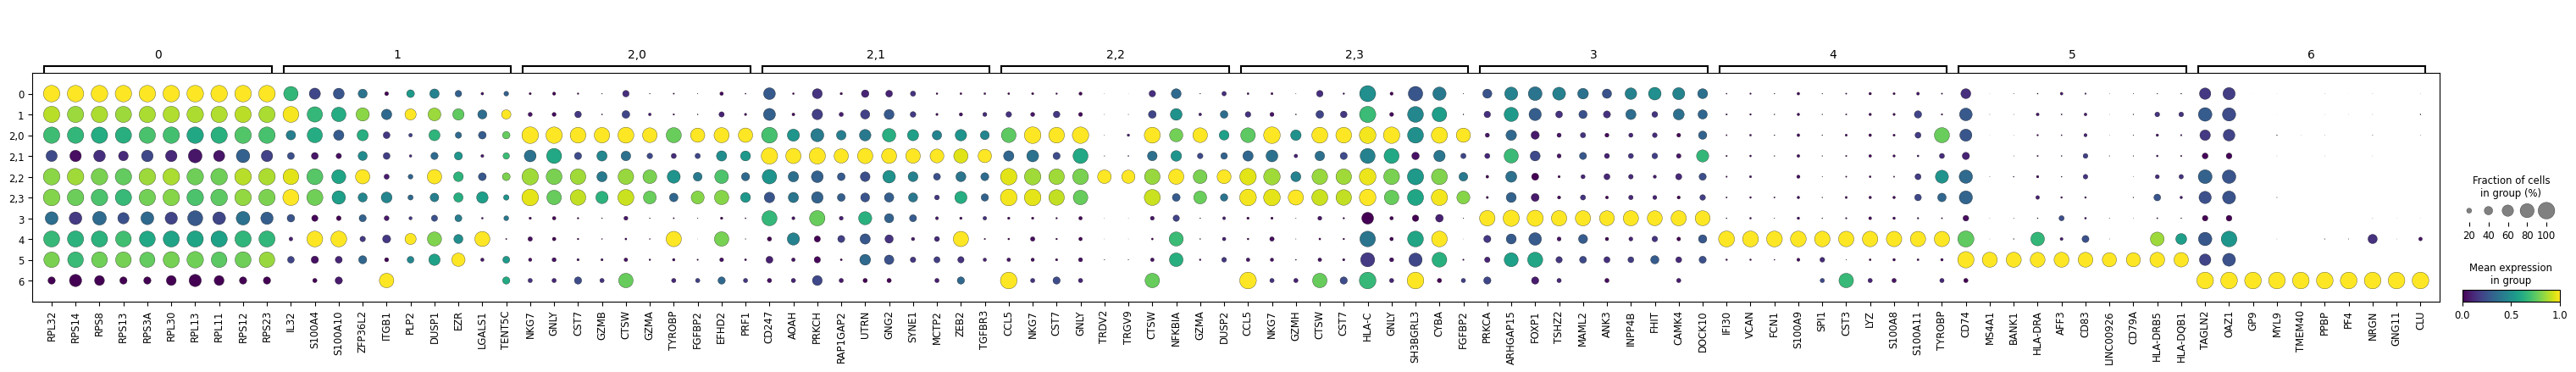

In [54]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    n_genes=10,
    color_map="viridis",
    standard_scale="var",
    min_logfoldchange=1.5,
    dendrogram=False,
)

In [59]:
gene_list = {
    "T cells": [
        "CD3D",
        "CD3E",
        "TRAC",
        "TRBC1",
        "TRBC2",
        "IFNG",
        "CD4",
        "CD8A",
        "CD8B",
    ],
    "gdT cells": ["TRDV2", "TRGV9"],
    "NK cells": [
        "GZMB",
        "PRF1",
        "KLRB1",
        "GNLY",
        "NCAM1",
        "NCR1",
    ],
    "Monocytes": [
        "CD74",
        "S100A11",
        "CD14",
        "FCGR3A",
        "FCN1",
    ],
    "DC": [
        "CLEC9A",
        "CLEC10A",
        "XCR1",
    ],
    "B cells": ["CD19", "MS4A1", "CD79A"],
    "Plasma cells": ["IGHA1", "IGHG1", "JCHAIN", "MZB1"],
    "Platelets": [
        "PPBP",
        "PF4",
    ],
}

In [60]:
gene_list

{'T cells': ['CD3D',
  'CD3E',
  'TRAC',
  'TRBC1',
  'TRBC2',
  'IFNG',
  'CD4',
  'CD8A',
  'CD8B'],
 'gdT cells': ['TRDV2', 'TRGV9'],
 'NK cells': ['GZMB', 'PRF1', 'KLRB1', 'GNLY', 'NCAM1', 'NCR1'],
 'Monocytes': ['CD74', 'S100A11', 'CD14', 'FCGR3A', 'FCN1'],
 'DC': ['CLEC9A', 'CLEC10A', 'XCR1'],
 'B cells': ['CD19', 'MS4A1', 'CD79A'],
 'Plasma cells': ['IGHA1', 'IGHG1', 'JCHAIN', 'MZB1'],
 'Platelets': ['PPBP', 'PF4']}

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


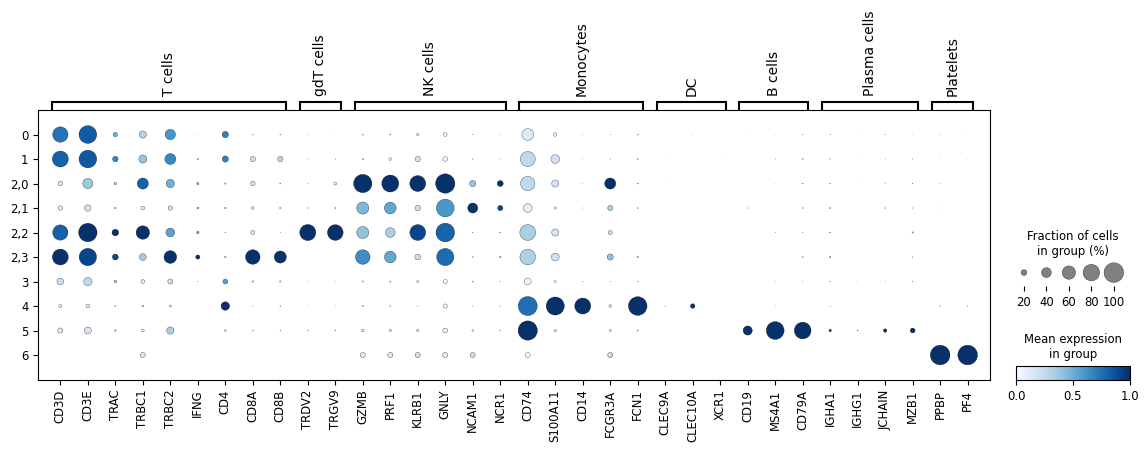

In [61]:
sc.pl.dotplot(
    adata, gene_list, groupby="leiden_R", standard_scale="var", color_map="Blues"
)

In [62]:
# create a dictionary
# {key: value}

cell_dict = {
    "0": "T cell",
    "1": "T cell",
    "2,0": "NK cell",
    "2,1": "NK cell",
    "2,2": "gamma-delta T cell",
    "2,3": "T cell",
    "3": "?",
    "4": "Monocyte",
    "5": "B cell",
    "6": "Platelet",
}

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


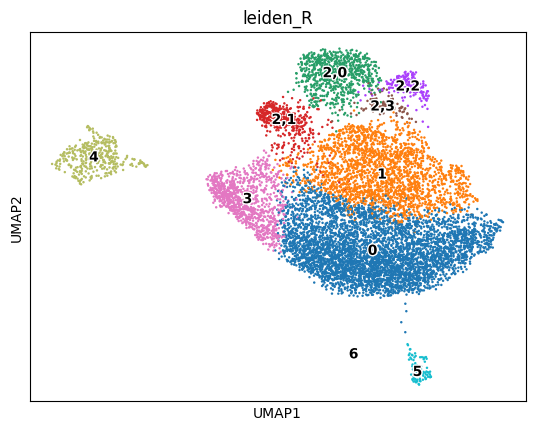

In [63]:
sc.pl.umap(adata, color="leiden_R", legend_loc="on data", legend_fontoutline=2)

In [65]:
cell_dict["0"]

'T cell'

In [66]:
cell_dict["6"]

'Platelet'

In [67]:
[cell_dict[x] for x in adata.obs["leiden_R"]]

['?',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 '?',
 '?',
 'T cell',
 'T cell',
 'NK cell',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 'NK cell',
 'T cell',
 'T cell',
 'NK cell',
 'T cell',
 'gamma-delta T cell',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 'NK cell',
 'T cell',
 'T cell',
 'T cell',
 'NK cell',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 'NK cell',
 'T cell',
 'T cell',
 'T cell',
 'NK cell',
 'T cell',
 '?',
 'T cell',
 'gamma-delta T cell',
 'T cell',
 'Monocyte',
 'NK cell',
 'NK cell',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 '?',
 'T cell',
 'T cell',
 'T cell',
 'gamma-delta T cell',
 'T cell',
 'T cell',
 'T cell',
 'Monocyte',
 'NK cell',
 'T cell',
 'T cell',
 'T cell',
 'NK cell',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 '?',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 'NK cell',
 'T cell',
 'T cell',
 'Monocyte',
 'NK cell',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 'T cell',
 'T cel

In [68]:
adata.obs["labels"] = [cell_dict[x] for x in adata.obs["leiden_R"]]
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,leiden_R,labels
AAACCTGAGATGTCGG-1,1006,1006,1517.0,31.0,2.043507,3,3,?
AAACCTGAGGATGTAT-1,1649,1649,3099.0,84.0,2.710552,2,"2,3",T cell
AAACCTGAGGCAAAGA-1,1320,1320,4114.0,98.0,2.382110,0,0,T cell
AAACCTGAGTACGCCC-1,1180,1178,3597.0,80.0,2.224076,0,0,T cell
AAACCTGAGTATTGGA-1,1179,1179,3444.0,73.0,2.119628,0,0,T cell
...,...,...,...,...,...,...,...,...
TTTGTCATCCGCAAGC-1,1391,1391,4386.0,85.0,1.937984,0,0,T cell
TTTGTCATCGACCAGC-1,1534,1534,3882.0,52.0,1.339516,0,0,T cell
TTTGTCATCTTAGCCC-1,740,740,984.0,41.0,4.166667,1,1,T cell
TTTGTCATCTTCGAGA-1,905,905,2027.0,83.0,4.094721,0,0,T cell


/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


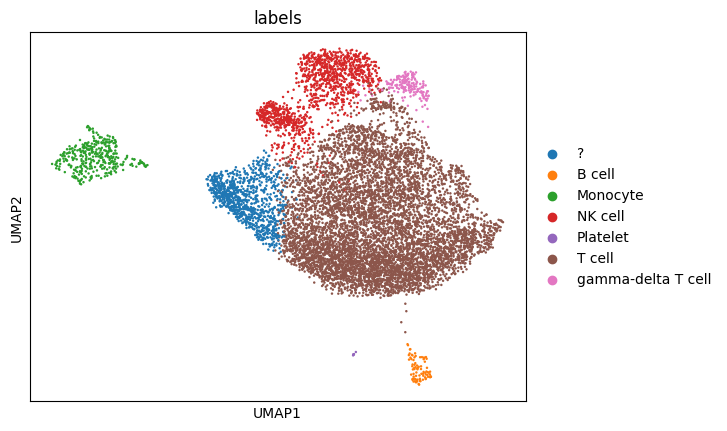

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


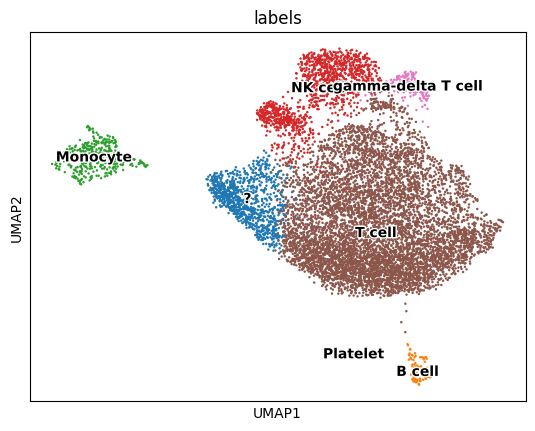

In [71]:
sc.pl.umap(
    adata,
    color="labels",
)
sc.pl.umap(adata, color="labels", legend_loc="on data", legend_fontoutline=2)

In [72]:
# create a dictionary
# {key: value}

cell_dict = {
    "0": "T cell",
    "1": "T cell",
    "2,0": "NK cell",
    "2,1": "NK cell",
    "2,2": "gamma-delta T cell",
    "2,3": "T cell",
    "3": "T cell",
    "4": "Monocyte",
    "5": "B cell",
    "6": "Platelet",
}

In [73]:
adata.obs["labels"] = [cell_dict[x] for x in adata.obs["leiden_R"]]
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,leiden_R,labels
AAACCTGAGATGTCGG-1,1006,1006,1517.0,31.0,2.043507,3,3,T cell
AAACCTGAGGATGTAT-1,1649,1649,3099.0,84.0,2.710552,2,"2,3",T cell
AAACCTGAGGCAAAGA-1,1320,1320,4114.0,98.0,2.382110,0,0,T cell
AAACCTGAGTACGCCC-1,1180,1178,3597.0,80.0,2.224076,0,0,T cell
AAACCTGAGTATTGGA-1,1179,1179,3444.0,73.0,2.119628,0,0,T cell
...,...,...,...,...,...,...,...,...
TTTGTCATCCGCAAGC-1,1391,1391,4386.0,85.0,1.937984,0,0,T cell
TTTGTCATCGACCAGC-1,1534,1534,3882.0,52.0,1.339516,0,0,T cell
TTTGTCATCTTAGCCC-1,740,740,984.0,41.0,4.166667,1,1,T cell
TTTGTCATCTTCGAGA-1,905,905,2027.0,83.0,4.094721,0,0,T cell


/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


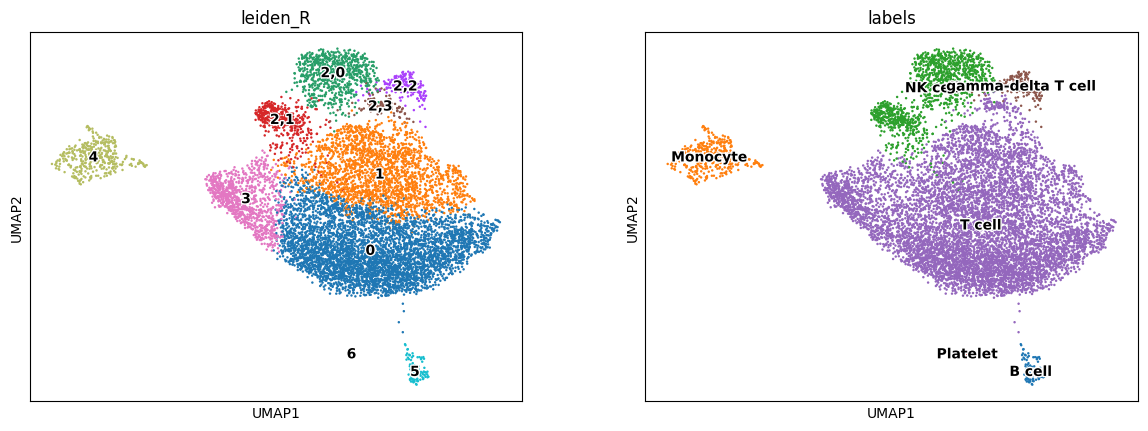

In [74]:
sc.pl.umap(
    adata, color=["leiden_R", "labels"], legend_loc="on data", legend_fontoutline=2
)

In [83]:
gene_list = {
    "T cells": [
        "CD3D",
        "CD3E",
        "TRAC",
        "TRBC1",
        "TRBC2",
        "IFNG",
    ],
    "CD4 vs CD8 T cells": [
        "CD4",
        "CD8A",
        "CD8B",
    ],
    "Treg": [
        "FOXP3",
        "IL10",
        "CTLA4",
    ],
    "memory vs naive": ["CCR7", "SELL", "CD44", "CD27"],
    "gdT cells": ["TRDV2", "TRGV9"],
    "NK cells": [
        "GZMB",
        "PRF1",
        "GNLY",
        "KLRB1",  # NK1.1
        "NCR1",  # NKp46
        "NCAM1",  # CD56
        "FCGR3A",  # CD16
    ],
    "Monocytes": [
        "CD74",
        "S100A11",
        "CD14",
        "FCGR3A",
        "FCN1",
    ],
    "DC": [
        "CLEC9A",
        "CLEC10A",
        "XCR1",
    ],
    "B cells": ["CD19", "MS4A1", "CD79A"],
    "Plasma cells": ["IGHA1", "IGHG1", "JCHAIN", "MZB1"],
    "Platelets": [
        "PPBP",
        "PF4",
    ],
}

/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


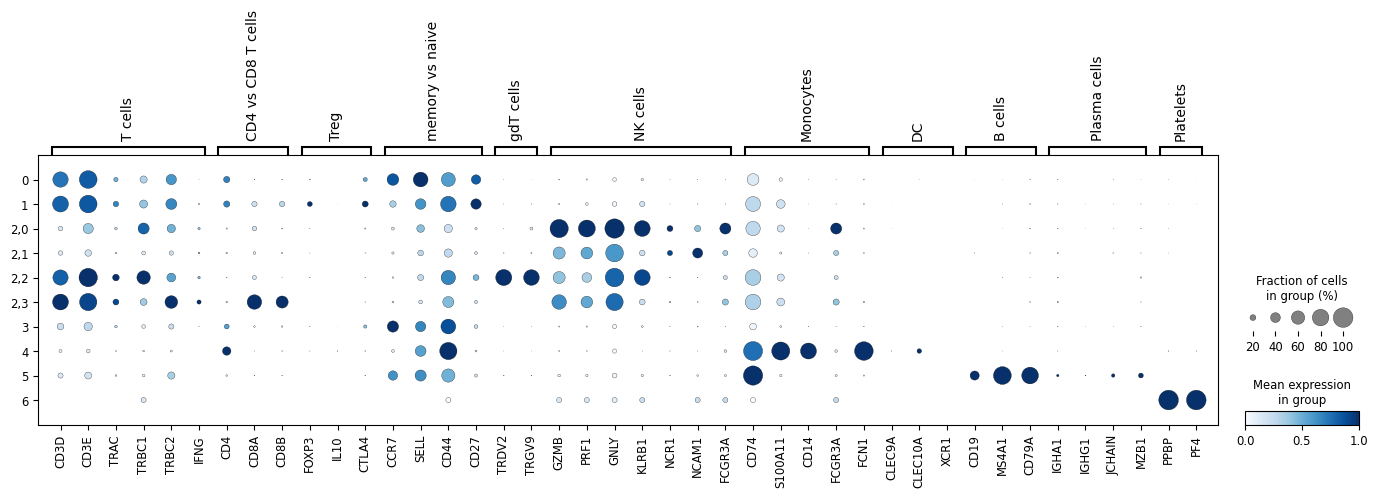

In [84]:
sc.pl.dotplot(
    adata, gene_list, groupby="leiden_R", standard_scale="var", color_map="Blues"
)

In [86]:
# create a dictionary
# {key: value}

# CCR7+CD62L(SELL)+CD44-CD27- naive T cells
# CCR7+CD62L(SELL)+CD44+CD27+ central memory T cells (Tcm)
# CCR7-CD62L(SELL)-CD44+CD27+ effector memory T cells (Tem)

cell_dict2 = {
    "0": "CD4 Tcm",
    "1": "Treg",
    "2,0": "NKT cell",
    "2,1": "NK cell",
    "2,2": "gamma-delta T cell",
    "2,3": "CD8 Tem",
    "3": "CD4 Tcm",
    "4": "Monocyte",
    "5": "B cell",
    "6": "Platelet",
}

In [87]:
adata.obs["labels_2"] = [cell_dict2[x] for x in adata.obs["leiden_R"]]
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,leiden_R,labels,labels_2
AAACCTGAGATGTCGG-1,1006,1006,1517.0,31.0,2.043507,3,3,T cell,CD4 Tcm
AAACCTGAGGATGTAT-1,1649,1649,3099.0,84.0,2.710552,2,"2,3",T cell,CD8 Tem
AAACCTGAGGCAAAGA-1,1320,1320,4114.0,98.0,2.382110,0,0,T cell,CD4 Tcm
AAACCTGAGTACGCCC-1,1180,1178,3597.0,80.0,2.224076,0,0,T cell,CD4 Tcm
AAACCTGAGTATTGGA-1,1179,1179,3444.0,73.0,2.119628,0,0,T cell,CD4 Tcm
...,...,...,...,...,...,...,...,...,...
TTTGTCATCCGCAAGC-1,1391,1391,4386.0,85.0,1.937984,0,0,T cell,CD4 Tcm
TTTGTCATCGACCAGC-1,1534,1534,3882.0,52.0,1.339516,0,0,T cell,CD4 Tcm
TTTGTCATCTTAGCCC-1,740,740,984.0,41.0,4.166667,1,1,T cell,Treg
TTTGTCATCTTCGAGA-1,905,905,2027.0,83.0,4.094721,0,0,T cell,CD4 Tcm


/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/Caskroom/mambaforge/base/envs/dandelion/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


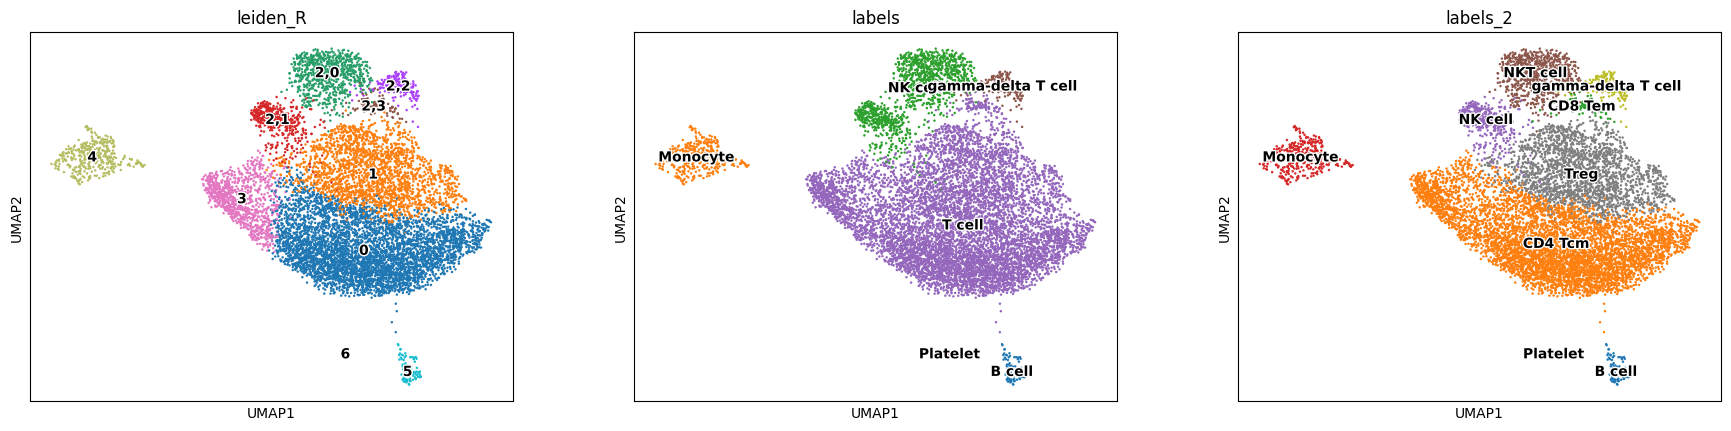

In [88]:
sc.pl.umap(
    adata,
    color=["leiden_R", "labels", "labels_2"],
    legend_loc="on data",
    legend_fontoutline=2,
)

In [89]:
adata.write_h5ad("/Users/uqztuong/Documents/PT112_BL_GEX_adata.h5ad")